In [87]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [88]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [89]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)

    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [90]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [91]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(n_components=200)
X = X.reshape(len(X), -1)

In [94]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.003906,0.000000,0.000000,0.000000,0.003906,0.003906,0.000000,0.011719,0.015625,0.003906,...,0.386719,0.925781,0.617188,0.371094,0.902344,0.605469,0.332031,0.859375,0.578125,0.277344
1,0.003906,0.000000,0.082031,0.003906,0.000000,0.070312,0.007812,0.000000,0.054688,0.011719,...,0.171875,0.105469,0.093750,0.113281,0.246094,0.218750,0.246094,0.285156,0.246094,0.277344
2,0.976562,0.980469,0.960938,0.980469,0.984375,0.945312,0.976562,0.984375,0.925781,0.996094,...,0.578125,0.789062,0.925781,0.546875,0.753906,0.906250,0.531250,0.644531,0.820312,0.457031
3,0.656250,0.656250,0.687500,0.652344,0.656250,0.683594,0.644531,0.660156,0.675781,0.648438,...,0.437500,0.324219,0.308594,0.445312,0.324219,0.308594,0.445312,0.324219,0.308594,0.445312
4,0.000000,0.546875,0.562500,0.000000,0.542969,0.542969,0.074219,0.503906,0.500000,0.273438,...,0.292969,0.906250,0.410156,0.363281,0.921875,0.449219,0.421875,0.910156,0.453125,0.441406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.570312,0.472656,0.417969,0.292969,0.167969,0.093750,0.351562,0.195312,0.093750,0.492188,...,0.664062,0.917969,0.730469,0.644531,0.886719,0.703125,0.621094,0.804688,0.621094,0.542969
668,0.992188,0.992188,0.996094,0.996094,0.988281,0.996094,0.996094,0.988281,0.996094,0.996094,...,0.812500,0.609375,0.601562,0.546875,0.957031,0.957031,0.917969,0.992188,0.992188,0.972656
669,0.957031,0.742188,0.542969,0.949219,0.746094,0.550781,0.949219,0.750000,0.562500,0.949219,...,0.968750,0.996094,0.984375,0.960938,0.996094,0.992188,0.972656,0.992188,0.996094,0.976562
670,0.964844,0.980469,0.281250,0.972656,0.988281,0.285156,0.968750,0.988281,0.277344,0.968750,...,0.324219,0.960938,0.964844,0.320312,0.992188,0.996094,0.429688,0.503906,0.511719,0.191406


In [95]:
X.shape

(672, 3072)

In [96]:
X_tilde = ((X - np.mean(X, axis= 0)))
pd.DataFrame(X_tilde)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,-0.736723,-0.737787,-0.728341,-0.738496,-0.730602,-0.720843,-0.738025,-0.721511,-0.708298,-0.729975,...,-0.202276,0.262992,-0.014794,-0.226789,0.235247,-0.033238,-0.273868,0.194830,-0.058582,-0.327724
1,-0.736723,-0.737787,-0.646310,-0.734590,-0.734509,-0.654436,-0.730213,-0.733230,-0.669236,-0.722162,...,-0.417120,-0.557321,-0.538231,-0.484602,-0.421003,-0.419957,-0.359805,-0.379389,-0.390613,-0.327724
2,0.235933,0.242682,0.232596,0.241972,0.249866,0.220564,0.238537,0.251145,0.201858,0.262213,...,-0.010870,0.126273,0.293800,-0.051008,0.086809,0.267543,-0.074649,-0.020014,0.183605,-0.148036
3,-0.084380,-0.081537,-0.040841,-0.086153,-0.078259,-0.041155,-0.093494,-0.073074,-0.048142,-0.085443,...,-0.151495,-0.338571,-0.323388,-0.152570,-0.342878,-0.330113,-0.160586,-0.340326,-0.328113,-0.159755
4,-0.740630,-0.190912,-0.165841,-0.738496,-0.191540,-0.181780,-0.663807,-0.229324,-0.223923,-0.460443,...,-0.296026,0.243461,-0.221825,-0.234602,0.254778,-0.189488,-0.184024,0.245611,-0.183582,-0.163661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-0.170317,-0.265131,-0.310372,-0.445528,-0.566540,-0.630999,-0.386463,-0.537917,-0.630173,-0.241693,...,0.075067,0.255179,0.098487,0.046648,0.219622,0.064418,0.015195,0.140143,-0.015613,-0.062099
668,0.251558,0.254400,0.267753,0.257597,0.253773,0.271345,0.258068,0.255051,0.272170,0.262213,...,0.223505,-0.053414,-0.030419,-0.051008,0.289934,0.318324,0.312070,0.327643,0.355480,0.367589
669,0.216402,0.004400,-0.185372,0.210722,0.011585,-0.173968,0.211193,0.016770,-0.161423,0.215338,...,0.379755,0.333304,0.352394,0.363055,0.328997,0.353481,0.366757,0.327643,0.359387,0.371495
670,0.224214,0.242682,-0.447091,0.234160,0.253773,-0.439593,0.230725,0.255051,-0.446580,0.234869,...,-0.264776,0.298148,0.332862,-0.277570,0.325091,0.357387,-0.176211,-0.160639,-0.124988,-0.413661


In [105]:
XXt = (X_tilde.dot(X_tilde.T))
eigenvalues, eigenvectors = np.linalg.eigh(XXt)
idx = list(range(len(eigenvalues)-1, -1, -1))
eigenvalues = eigenvalues[::-1]
temp = eigenvectors.copy()
eigenvectors = eigenvectors[:, idx]
import pandas as pd
pd.DataFrame(eigenvalues)

,0
0,5.403709e+04
1,1.340787e+04
2,8.689792e+03
3,4.766806e+03
4,4.337386e+03
...,...
667,5.636055e-01
668,4.777924e-01
669,4.456738e-01
670,4.128725e-01


In [106]:
pd.DataFrame(XXt)

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,376.099942,265.618413,47.187570,89.441648,190.233148,-4.280133,-118.011915,5.709227,-19.817142,1.827206,...,-162.204728,-85.458520,16.987425,185.745737,-89.055920,102.505542,-126.428939,-140.202113,46.976091,-113.879527
1,265.618413,458.473278,42.010987,103.554769,170.560960,10.991221,-176.271292,-41.450602,15.694523,-98.492931,...,-161.330865,-53.099183,-30.517481,198.080904,-79.684285,88.239436,-101.372199,-116.846072,-10.852149,-109.300891
2,47.187570,42.010987,278.884084,55.907969,43.965215,14.484832,25.581648,5.331645,-10.731269,-10.174125,...,-54.550053,-11.452801,-2.432958,22.537192,-24.901779,30.641845,-14.755801,-20.018538,34.162184,-4.198836
3,89.441648,103.554769,55.907969,204.106505,72.175287,8.601123,-33.989423,-9.694261,9.158338,-25.819583,...,-58.367508,-28.845650,11.443343,102.147700,28.925908,14.312076,-39.036604,-41.004999,36.641054,-21.842372
4,190.233148,170.560960,43.965215,72.175287,278.230428,74.957579,-8.058764,81.516062,-1.903159,0.365380,...,-140.962483,-63.321088,-29.124578,96.308829,-136.647049,19.277694,-111.329455,-112.414885,8.754789,-92.041915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,102.505542,88.239436,30.641845,14.312076,19.277694,-25.302131,-48.905434,-38.131191,8.540362,-14.520216,...,-27.118312,-4.896533,-33.240612,55.486343,-17.756399,224.528695,-13.321374,-18.370869,16.338661,-21.696630
668,-126.428939,-101.372199,-14.755801,-39.036604,-111.329455,-7.362481,16.152395,-54.775770,2.856690,-3.626937,...,77.572498,61.462505,8.973513,-68.333147,102.105568,-13.321374,197.375249,90.288431,12.465963,61.326501
669,-140.202113,-116.846072,-20.018538,-41.004999,-112.414885,18.649913,29.561304,-51.032388,-7.825755,-15.749095,...,107.499168,72.897689,8.723914,-59.633619,55.391232,-18.370869,90.288431,178.231977,-0.248587,91.500775
670,46.976091,-10.852149,34.162184,36.641054,8.754789,7.251823,37.441748,-16.144651,-23.771270,24.381043,...,-26.818097,-23.953160,33.926135,52.406645,20.486794,16.338661,12.465963,-0.248587,257.856161,5.424676


In [107]:
pd.DataFrame(eigenvectors)

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,-0.068143,0.033977,0.002228,-0.093849,0.014027,-0.019879,0.014734,-0.000771,0.039741,-0.033990,...,-0.018216,0.025838,-0.004973,0.014526,0.020341,-0.045345,0.004114,-0.007526,0.006004,0.038576
1,-0.052291,0.109741,0.005149,-0.025192,-0.006065,-0.029349,0.070427,0.002162,-0.037503,0.016257,...,-0.004956,0.008004,-0.023302,-0.017430,0.006805,0.032925,-0.007413,0.008288,0.005693,0.038576
2,-0.013645,-0.009900,-0.012459,-0.071736,0.031713,0.072958,-0.047369,0.018898,-0.054866,-0.058502,...,0.002306,0.003040,0.002784,0.014831,0.001351,-0.008468,-0.012110,0.001402,-0.009873,0.038576
3,-0.019467,0.027990,0.013958,-0.024286,0.060587,-0.023621,0.022109,0.027777,-0.019008,-0.048938,...,-0.010693,-0.019733,-0.000611,0.016294,-0.009602,-0.003424,0.012309,0.003660,-0.005209,0.038576
4,-0.044680,0.032284,-0.072442,-0.013298,0.035769,-0.004108,0.017511,-0.012969,-0.046199,0.024940,...,0.014921,0.009278,0.001699,0.008785,0.011050,0.003337,0.007415,-0.009163,0.003450,0.038576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-0.015714,0.017156,0.019381,-0.076882,-0.060591,0.033476,0.012646,0.012360,-0.003994,-0.065639,...,-0.006304,-0.007601,0.001187,0.011279,-0.000910,0.000414,0.001068,0.010818,-0.017941,0.038576
668,0.039019,-0.010756,0.029371,-0.020198,0.032315,0.007928,0.064831,0.025437,0.043916,-0.009204,...,-0.014897,0.022167,0.022037,-0.014726,0.010898,0.016140,0.012384,0.001383,-0.002527,0.038576
669,0.044219,0.007548,0.007766,-0.040619,-0.007644,0.014382,-0.025018,0.034980,0.005076,-0.003370,...,-0.017608,-0.025649,-0.000041,0.017979,-0.011833,0.004928,0.010373,0.017225,-0.010793,0.038576
670,-0.006031,-0.026004,0.016207,-0.072106,0.100514,-0.048157,0.049778,-0.036952,-0.025237,-0.059022,...,0.030762,0.005216,-0.009321,-0.005109,0.023125,-0.030219,-0.002102,-0.009144,0.003238,0.038576


In [109]:
pd.DataFrame(temp)

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.038576,0.006004,-0.007526,0.004114,-0.045345,0.020341,0.014526,-0.004973,0.025838,-0.018216,...,-0.033990,0.039741,-0.000771,0.014734,-0.019879,0.014027,-0.093849,0.002228,0.033977,-0.068143
1,0.038576,0.005693,0.008288,-0.007413,0.032925,0.006805,-0.017430,-0.023302,0.008004,-0.004956,...,0.016257,-0.037503,0.002162,0.070427,-0.029349,-0.006065,-0.025192,0.005149,0.109741,-0.052291
2,0.038576,-0.009873,0.001402,-0.012110,-0.008468,0.001351,0.014831,0.002784,0.003040,0.002306,...,-0.058502,-0.054866,0.018898,-0.047369,0.072958,0.031713,-0.071736,-0.012459,-0.009900,-0.013645
3,0.038576,-0.005209,0.003660,0.012309,-0.003424,-0.009602,0.016294,-0.000611,-0.019733,-0.010693,...,-0.048938,-0.019008,0.027777,0.022109,-0.023621,0.060587,-0.024286,0.013958,0.027990,-0.019467
4,0.038576,0.003450,-0.009163,0.007415,0.003337,0.011050,0.008785,0.001699,0.009278,0.014921,...,0.024940,-0.046199,-0.012969,0.017511,-0.004108,0.035769,-0.013298,-0.072442,0.032284,-0.044680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.038576,-0.017941,0.010818,0.001068,0.000414,-0.000910,0.011279,0.001187,-0.007601,-0.006304,...,-0.065639,-0.003994,0.012360,0.012646,0.033476,-0.060591,-0.076882,0.019381,0.017156,-0.015714
668,0.038576,-0.002527,0.001383,0.012384,0.016140,0.010898,-0.014726,0.022037,0.022167,-0.014897,...,-0.009204,0.043916,0.025437,0.064831,0.007928,0.032315,-0.020198,0.029371,-0.010756,0.039019
669,0.038576,-0.010793,0.017225,0.010373,0.004928,-0.011833,0.017979,-0.000041,-0.025649,-0.017608,...,-0.003370,0.005076,0.034980,-0.025018,0.014382,-0.007644,-0.040619,0.007766,0.007548,0.044219
670,0.038576,0.003238,-0.009144,-0.002102,-0.030219,0.023125,-0.005109,-0.009321,0.005216,0.030762,...,-0.059022,-0.025237,-0.036952,0.049778,-0.048157,0.100514,-0.072106,0.016207,-0.026004,-0.006031


In [100]:
eigenvector_C = X_tilde.T.dot(eigenvectors)# perform linear combination with Matrix A_tilde
pd.DataFrame(eigenvector_C)

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,5.329404,-2.641349,-0.337571,0.268636,0.920916,-2.287879,-0.535240,-0.616048,1.005483,-0.252989,...,-0.011192,-0.013872,-0.015642,0.014012,-0.010688,-0.015567,0.001735,0.017874,-0.004881,-2.681189e-14
1,5.574258,-2.917531,-0.585211,1.157455,0.460350,-2.001553,-0.503439,-0.130959,0.616410,0.588435,...,-0.004059,-0.003666,0.002863,-0.004835,-0.004903,0.000151,-0.005581,0.009971,-0.005033,-8.326673e-15
2,5.795534,-2.716866,-0.872691,1.666760,0.079532,-1.624955,-0.638731,0.342837,0.145825,1.412232,...,-0.000229,-0.011700,-0.008105,0.013962,0.016387,0.004003,-0.006650,0.016872,-0.004666,1.554312e-15
3,5.305778,-2.742531,-0.249217,0.337724,1.007140,-2.492572,-0.676082,-0.736598,0.957744,-0.235497,...,-0.015584,-0.021895,-0.015670,0.012156,-0.015287,-0.013015,0.003690,-0.002519,-0.005162,-1.681988e-14
4,5.551773,-3.021146,-0.513655,1.278282,0.525124,-2.170089,-0.619378,-0.226104,0.560025,0.627184,...,0.000923,-0.011615,0.007021,-0.010313,-0.007973,-0.003148,-0.007866,-0.012741,-0.005278,-1.104672e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,4.683386,-1.342772,-2.598731,-1.052009,0.707001,2.289940,-1.334054,-0.453909,1.902924,-0.737966,...,0.022714,-0.027083,0.013150,-0.054170,-0.000769,0.011621,-0.015975,0.014675,-0.033179,8.465451e-15
3068,4.941715,-1.282522,-2.748747,-0.490831,0.326239,2.512359,-1.558956,0.155364,1.761312,-0.287147,...,0.028925,-0.030397,0.023115,-0.028526,0.000777,0.019474,-0.025595,0.012673,-0.027893,5.759282e-15
3069,4.691583,-1.188672,-1.945237,-1.585421,0.988322,1.472257,-1.054933,-0.859812,1.745584,-1.153389,...,-0.016047,0.023287,-0.003849,0.049395,-0.007587,-0.007882,0.019548,-0.017523,0.049576,5.162537e-15
3070,4.787774,-1.544852,-2.569492,-0.936823,0.412447,2.216243,-1.168520,-0.192854,1.692501,-0.885399,...,0.002327,0.009504,0.000133,0.019638,-0.022066,0.000264,0.012163,-0.017790,0.028070,8.423817e-15


[0, 1, 2, 3, 4]


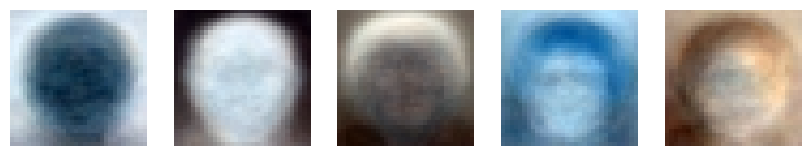

In [101]:
def plot(image,H,W,C,indices):
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = list(range(0, 5))
print(indices)
plot(eigenvector_C.T,H,W,C, indices)